In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

train = pd.read_csv("./data/santander_customer/train.csv", encoding='latin-1')
test = pd.read_csv("./data/santander_customer/test.csv", encoding='latin-1')
sub = pd.read_csv("./data/santander_customer/sample_submission.csv")

train.shape, test.shape, sub.shape

((76020, 371), (75818, 370), (75818, 2))

In [4]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [7]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [8]:
unsatified = train['TARGET'].value_counts()[1]
unsatified / train['TARGET'].count()  # 비율

0.0395685345961589

In [9]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
train['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [11]:
# -999999를 가장 많은 값으로 변경
train['var3'].replace(-999999, 2, inplace=True)

In [12]:
## ID 열을 삭제
# train.drop('ID', axis=1, inplace=True)
train = train.loc[  :, "var3":  ]
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [13]:
# 피처와 레이블를 지정.
X = train.iloc[:, :-1]
y = train['TARGET']

X.shape, y.shape

((76020, 369), (76020,))

In [14]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

In [15]:
## 레이블 분포비율
print( "학습용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )
print( "테스트용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )

학습용 레이블 분포 비율 : 
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트용 레이블 분포 비율 : 
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_model = XGBClassifier(n_estimators=500, random_state=156)
xgb_model.fit(X_train, y_train, early_stopping_rounds=100,
              eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82745
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84055
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88071	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, ...)

In [17]:
pred_prob = xgb_model.predict_proba(X_test)[:, 1]
pred_prob

array([0.00643863, 0.02387667, 0.01260844, ..., 0.05883254, 0.01729385,
       0.01727541], dtype=float32)

In [18]:
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.8413


In [19]:
%%time

from sklearn.model_selection import GridSearchCV

# 우선 하이퍼 파라미터 수행 속도를 향상을 위해 100으로
xgb_model1 = XGBClassifier(n_estimators=100, use_label_encoder=False)
params = {"max_depth":[5,7],
          "min_child_weight":[1,3],
          "colsample_bytree":[0.5, 0.75]}

gridcv = GridSearchCV(xgb_model1, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, 
            eval_metric='auc', 
            eval_set = [(X_train, y_train), (X_test, y_test)])

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.79161	validation_1-auc:0.79321
[1]	validation_0-auc:0.81865	validation_1-auc:0.81375
[2]	validation_0-auc:0.82586	validation_1-auc:0.81846
[3]	validation_0-auc:0.82789	validation_1-auc:0.82226
[4]	validation_0-auc:0.83249	validation_1-auc:0.82677
[5]	validation_0-auc:0.83477	validation_1-auc:0.83225
[6]	validation_0-auc:0.83340	validation_1-auc:0.82654
[7]	validation_0-auc:0.84223	validation_1-auc:0.83487
[8]	validation_0-auc:0.84586	validation_1-auc:0.83682
[9]	validation_0-auc:0.84557	validation_1-auc:0.83472
[10]	validation_0-auc:0.84423	validation_1-auc:0.83181
[11]	validation_0-auc:0.84428	validation_1-auc:0.82920
[12]	validation_0-auc:0.85176	validation_1-auc:0.83433
[13]	validation_0-auc:0.85540	validation_1-auc:0.83565
[14]	validation_0-auc:0.85719	validation_1-auc:0.83696
[15]	validation_0-auc:0.85849	validation_1-auc:0.83561
[16]	validation_0-auc:0.85964	validation_1-auc:0.83578
[17]	validation_0-auc:0.86092	validation_1-auc:0.83570
[18]	validation_0-au

[56]	validation_0-auc:0.88146	validation_1-auc:0.83872
[57]	validation_0-auc:0.88158	validation_1-auc:0.83860
[58]	validation_0-auc:0.88183	validation_1-auc:0.83810
[59]	validation_0-auc:0.88191	validation_1-auc:0.83774
[60]	validation_0-auc:0.88215	validation_1-auc:0.83723
[0]	validation_0-auc:0.79210	validation_1-auc:0.79292
[1]	validation_0-auc:0.81759	validation_1-auc:0.81404
[2]	validation_0-auc:0.82567	validation_1-auc:0.81864
[3]	validation_0-auc:0.82819	validation_1-auc:0.82244
[4]	validation_0-auc:0.83233	validation_1-auc:0.82618
[5]	validation_0-auc:0.83480	validation_1-auc:0.83163
[6]	validation_0-auc:0.83342	validation_1-auc:0.82840
[7]	validation_0-auc:0.84265	validation_1-auc:0.83512
[8]	validation_0-auc:0.84614	validation_1-auc:0.83742
[9]	validation_0-auc:0.84573	validation_1-auc:0.83475
[10]	validation_0-auc:0.84426	validation_1-auc:0.83066
[11]	validation_0-auc:0.84358	validation_1-auc:0.82936
[12]	validation_0-auc:0.85089	validation_1-auc:0.83491
[13]	validation_0-au

[52]	validation_0-auc:0.87650	validation_1-auc:0.84097
[0]	validation_0-auc:0.80843	validation_1-auc:0.80885
[1]	validation_0-auc:0.82920	validation_1-auc:0.82211
[2]	validation_0-auc:0.83320	validation_1-auc:0.82400
[3]	validation_0-auc:0.83624	validation_1-auc:0.82577
[4]	validation_0-auc:0.84188	validation_1-auc:0.82897
[5]	validation_0-auc:0.84455	validation_1-auc:0.83377
[6]	validation_0-auc:0.84503	validation_1-auc:0.82916
[7]	validation_0-auc:0.85319	validation_1-auc:0.83365
[8]	validation_0-auc:0.85976	validation_1-auc:0.83390
[9]	validation_0-auc:0.85952	validation_1-auc:0.82834
[10]	validation_0-auc:0.85919	validation_1-auc:0.82378
[11]	validation_0-auc:0.85956	validation_1-auc:0.82400
[12]	validation_0-auc:0.86574	validation_1-auc:0.82888
[13]	validation_0-auc:0.87028	validation_1-auc:0.83251
[14]	validation_0-auc:0.87240	validation_1-auc:0.83311
[15]	validation_0-auc:0.87366	validation_1-auc:0.83080
[16]	validation_0-auc:0.87568	validation_1-auc:0.83134
[17]	validation_0-au

[19]	validation_0-auc:0.87498	validation_1-auc:0.83324
[20]	validation_0-auc:0.87502	validation_1-auc:0.83267
[21]	validation_0-auc:0.87528	validation_1-auc:0.83259
[22]	validation_0-auc:0.87571	validation_1-auc:0.83273
[23]	validation_0-auc:0.87659	validation_1-auc:0.83362
[24]	validation_0-auc:0.87708	validation_1-auc:0.83315
[25]	validation_0-auc:0.87741	validation_1-auc:0.83338
[26]	validation_0-auc:0.87761	validation_1-auc:0.83358
[27]	validation_0-auc:0.87814	validation_1-auc:0.83337
[28]	validation_0-auc:0.87820	validation_1-auc:0.83346
[29]	validation_0-auc:0.87882	validation_1-auc:0.83331
[30]	validation_0-auc:0.87900	validation_1-auc:0.83315
[31]	validation_0-auc:0.87990	validation_1-auc:0.83277
[32]	validation_0-auc:0.88062	validation_1-auc:0.83284
[33]	validation_0-auc:0.88094	validation_1-auc:0.83339
[34]	validation_0-auc:0.88210	validation_1-auc:0.83309
[35]	validation_0-auc:0.88208	validation_1-auc:0.83317
[36]	validation_0-auc:0.88225	validation_1-auc:0.83314
[37]	valid

[42]	validation_0-auc:0.87754	validation_1-auc:0.83254
[43]	validation_0-auc:0.87845	validation_1-auc:0.83286
[44]	validation_0-auc:0.87845	validation_1-auc:0.83268
[0]	validation_0-auc:0.80863	validation_1-auc:0.80011
[1]	validation_0-auc:0.82349	validation_1-auc:0.81717
[2]	validation_0-auc:0.82654	validation_1-auc:0.81737
[3]	validation_0-auc:0.82988	validation_1-auc:0.82281
[4]	validation_0-auc:0.83570	validation_1-auc:0.82554
[5]	validation_0-auc:0.83917	validation_1-auc:0.82930
[6]	validation_0-auc:0.84492	validation_1-auc:0.83396
[7]	validation_0-auc:0.84657	validation_1-auc:0.83569
[8]	validation_0-auc:0.84837	validation_1-auc:0.83476
[9]	validation_0-auc:0.85009	validation_1-auc:0.83841
[10]	validation_0-auc:0.85017	validation_1-auc:0.83887
[11]	validation_0-auc:0.85091	validation_1-auc:0.83724
[12]	validation_0-auc:0.85584	validation_1-auc:0.83976
[13]	validation_0-auc:0.85900	validation_1-auc:0.84063
[14]	validation_0-auc:0.86060	validation_1-auc:0.84054
[15]	validation_0-au

[10]	validation_0-auc:0.84996	validation_1-auc:0.83746
[11]	validation_0-auc:0.84929	validation_1-auc:0.83715
[12]	validation_0-auc:0.85506	validation_1-auc:0.83957
[13]	validation_0-auc:0.85817	validation_1-auc:0.84131
[14]	validation_0-auc:0.85946	validation_1-auc:0.84041
[15]	validation_0-auc:0.86040	validation_1-auc:0.83984
[16]	validation_0-auc:0.86126	validation_1-auc:0.83954
[17]	validation_0-auc:0.86170	validation_1-auc:0.83947
[18]	validation_0-auc:0.86276	validation_1-auc:0.83945
[19]	validation_0-auc:0.86327	validation_1-auc:0.84019
[20]	validation_0-auc:0.86381	validation_1-auc:0.84075
[21]	validation_0-auc:0.86454	validation_1-auc:0.84078
[22]	validation_0-auc:0.86531	validation_1-auc:0.84165
[23]	validation_0-auc:0.86598	validation_1-auc:0.84128
[24]	validation_0-auc:0.86650	validation_1-auc:0.84078
[25]	validation_0-auc:0.86717	validation_1-auc:0.84069
[26]	validation_0-auc:0.86742	validation_1-auc:0.84066
[27]	validation_0-auc:0.86807	validation_1-auc:0.84017
[28]	valid

[20]	validation_0-auc:0.88717	validation_1-auc:0.83800
[21]	validation_0-auc:0.88814	validation_1-auc:0.83800
[22]	validation_0-auc:0.88867	validation_1-auc:0.83811
[23]	validation_0-auc:0.88984	validation_1-auc:0.83780
[24]	validation_0-auc:0.89035	validation_1-auc:0.83731
[25]	validation_0-auc:0.89094	validation_1-auc:0.83717
[26]	validation_0-auc:0.89143	validation_1-auc:0.83694
[27]	validation_0-auc:0.89200	validation_1-auc:0.83660
[28]	validation_0-auc:0.89281	validation_1-auc:0.83711
[29]	validation_0-auc:0.89290	validation_1-auc:0.83771
[30]	validation_0-auc:0.89310	validation_1-auc:0.83717
[31]	validation_0-auc:0.89338	validation_1-auc:0.83704
[32]	validation_0-auc:0.89415	validation_1-auc:0.83731
[33]	validation_0-auc:0.89484	validation_1-auc:0.83674
[34]	validation_0-auc:0.89584	validation_1-auc:0.83723
[35]	validation_0-auc:0.89607	validation_1-auc:0.83724
[36]	validation_0-auc:0.89655	validation_1-auc:0.83646
[37]	validation_0-auc:0.89681	validation_1-auc:0.83664
[38]	valid

[35]	validation_0-auc:0.88740	validation_1-auc:0.83792
[36]	validation_0-auc:0.88756	validation_1-auc:0.83799
[37]	validation_0-auc:0.88854	validation_1-auc:0.83840
[38]	validation_0-auc:0.88961	validation_1-auc:0.83815
[0]	validation_0-auc:0.82297	validation_1-auc:0.81707
[1]	validation_0-auc:0.83141	validation_1-auc:0.82133
[2]	validation_0-auc:0.83805	validation_1-auc:0.82785
[3]	validation_0-auc:0.84271	validation_1-auc:0.82902
[4]	validation_0-auc:0.84766	validation_1-auc:0.83398
[5]	validation_0-auc:0.85126	validation_1-auc:0.83381
[6]	validation_0-auc:0.85486	validation_1-auc:0.83360
[7]	validation_0-auc:0.85944	validation_1-auc:0.83287
[8]	validation_0-auc:0.86243	validation_1-auc:0.83187
[9]	validation_0-auc:0.86501	validation_1-auc:0.83304
[10]	validation_0-auc:0.86496	validation_1-auc:0.83318
[11]	validation_0-auc:0.86466	validation_1-auc:0.83180
[12]	validation_0-auc:0.87013	validation_1-auc:0.83453
[13]	validation_0-auc:0.87319	validation_1-auc:0.83548
[14]	validation_0-au

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [20]:
print("GridSearchCV  최적 파라미터 : ", gridcv.best_params_ )

pred_prob = gridcv.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:4f}".format(xgb_roc_score))

GridSearchCV  최적 파라미터 :  {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC : 0.844455


In [21]:
%%time

xgb_model_l = XGBClassifier(n_estimators=1000,
                            random_state= 77, 
                            learning_rate=0.02,
                            max_depth=5,
                            min_child_weight=3,
                            colsample_bytree=0.5, 
                            reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행
xgb_model_l.fit(X_train, y_train, early_stopping_rounds=200,
              eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71704	validation_1-auc:0.71652
[1]	validation_0-auc:0.74880	validation_1-auc:0.74950
[2]	validation_0-auc:0.80419	validation_1-auc:0.80604
[3]	validation_0-auc:0.81857	validation_1-auc:0.82137
[4]	validation_0-auc:0.81688	validation_1-auc:0.81994
[5]	validation_0-auc:0.81520	validation_1-auc:0.81725
[6]	validation_0-auc:0.81233	validation_1-auc:0.81439
[7]	validation_0-auc:0.81679	validation_1-auc:0.82061
[8]	validation_0-auc:0.82137	validation_1-auc:0.82476
[9]	validation_0-auc:0.81892	validation_1-auc:0.82203
[10]	validation_0-auc:0.81739	validation_1-auc:0.82076
[11]	validation_0-auc:0.81695	validation_1-auc:0.81954
[12]	validation_0-auc:0.81554	validation_1-auc:0.81830
[13]	validation_0-auc:0.81406	validation_1-auc:0.81690
[14]	validation_0-auc:0.81343	validation_1-auc:0.81583
[15]	validation_0-auc:0.81382	validation_1-auc:0.81518
[16]	validation_0-auc:0.81743	validation_1-auc:0.81833
[17]	validation_0-auc:0.81998	validation_1-auc:0.82008
[18]	validation_0-au

[149]	validation_0-auc:0.85040	validation_1-auc:0.83825
[150]	validation_0-auc:0.85045	validation_1-auc:0.83822
[151]	validation_0-auc:0.85066	validation_1-auc:0.83857
[152]	validation_0-auc:0.85099	validation_1-auc:0.83900
[153]	validation_0-auc:0.85088	validation_1-auc:0.83894
[154]	validation_0-auc:0.85103	validation_1-auc:0.83878
[155]	validation_0-auc:0.85097	validation_1-auc:0.83855
[156]	validation_0-auc:0.85133	validation_1-auc:0.83893
[157]	validation_0-auc:0.85185	validation_1-auc:0.83911
[158]	validation_0-auc:0.85186	validation_1-auc:0.83915
[159]	validation_0-auc:0.85172	validation_1-auc:0.83904
[160]	validation_0-auc:0.85239	validation_1-auc:0.83933
[161]	validation_0-auc:0.85286	validation_1-auc:0.83943
[162]	validation_0-auc:0.85292	validation_1-auc:0.83936
[163]	validation_0-auc:0.85297	validation_1-auc:0.83942
[164]	validation_0-auc:0.85291	validation_1-auc:0.83933
[165]	validation_0-auc:0.85297	validation_1-auc:0.83911
[166]	validation_0-auc:0.85351	validation_1-auc:

[296]	validation_0-auc:0.87043	validation_1-auc:0.84503
[297]	validation_0-auc:0.87050	validation_1-auc:0.84502
[298]	validation_0-auc:0.87056	validation_1-auc:0.84503
[299]	validation_0-auc:0.87069	validation_1-auc:0.84502
[300]	validation_0-auc:0.87080	validation_1-auc:0.84513
[301]	validation_0-auc:0.87089	validation_1-auc:0.84511
[302]	validation_0-auc:0.87091	validation_1-auc:0.84508
[303]	validation_0-auc:0.87104	validation_1-auc:0.84506
[304]	validation_0-auc:0.87110	validation_1-auc:0.84513
[305]	validation_0-auc:0.87124	validation_1-auc:0.84509
[306]	validation_0-auc:0.87130	validation_1-auc:0.84504
[307]	validation_0-auc:0.87143	validation_1-auc:0.84504
[308]	validation_0-auc:0.87154	validation_1-auc:0.84495
[309]	validation_0-auc:0.87162	validation_1-auc:0.84493
[310]	validation_0-auc:0.87163	validation_1-auc:0.84492
[311]	validation_0-auc:0.87171	validation_1-auc:0.84499
[312]	validation_0-auc:0.87182	validation_1-auc:0.84499
[313]	validation_0-auc:0.87191	validation_1-auc:

[443]	validation_0-auc:0.87839	validation_1-auc:0.84497
[444]	validation_0-auc:0.87841	validation_1-auc:0.84495
[445]	validation_0-auc:0.87843	validation_1-auc:0.84498
[446]	validation_0-auc:0.87845	validation_1-auc:0.84497
[447]	validation_0-auc:0.87855	validation_1-auc:0.84495
[448]	validation_0-auc:0.87859	validation_1-auc:0.84493
[449]	validation_0-auc:0.87864	validation_1-auc:0.84492
[450]	validation_0-auc:0.87866	validation_1-auc:0.84493
[451]	validation_0-auc:0.87868	validation_1-auc:0.84494
[452]	validation_0-auc:0.87872	validation_1-auc:0.84494
[453]	validation_0-auc:0.87880	validation_1-auc:0.84493
[454]	validation_0-auc:0.87889	validation_1-auc:0.84495
[455]	validation_0-auc:0.87890	validation_1-auc:0.84493
[456]	validation_0-auc:0.87895	validation_1-auc:0.84495
[457]	validation_0-auc:0.87898	validation_1-auc:0.84496
[458]	validation_0-auc:0.87902	validation_1-auc:0.84497
[459]	validation_0-auc:0.87903	validation_1-auc:0.84497
[460]	validation_0-auc:0.87907	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=77,
              reg_alpha=0.03, reg_lambda=1, ...)

In [22]:
pred_prob = xgb_model_l.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:4f}".format(xgb_roc_score))

ROC AUC : 0.845269


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

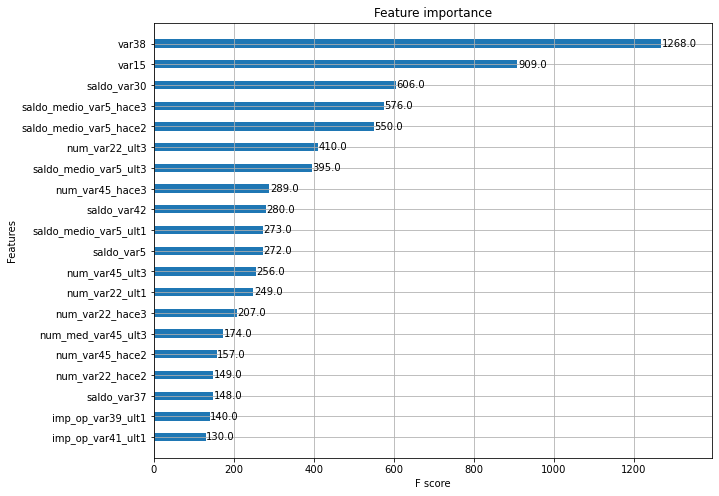

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_model_l, ax=ax, max_num_features=20, height=0.4)

## **ROC AUC : 0.845269**

## **산탄데르 고객 만족 예측 - 분류**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
train = pd.read_csv("./data/santander_customer/train.csv", encoding='latin-1')
test = pd.read_csv("./data/santander_customer/test.csv", encoding='latin-1')
sub = pd.read_csv("./data/santander_customer/sample_submission.csv")

train.shape, test.shape, sub.shape

((76020, 371), (75818, 370), (75818, 2))

In [25]:
## ID 열을 삭제
# train.drop('ID', axis=1, inplace=True)
train = train.loc[  :, "var3":  ]
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [26]:
# 피처와 레이블를 지정.
X = train.iloc[:, :-1]
y = train['TARGET']

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

In [28]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [29]:
%%time

lgbm_model = LGBMClassifier(n_estimators = 500)
evals = [(X_test, y_test)]

lgbm_model.fit(X_train, y_train, early_stopping_rounds=100,
               eval_metric='auc', eval_set=evals, 
               verbose=True)

D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.83419	valid_0's binary_logloss: 0.149407
[7]	valid_0's auc: 0.837155	valid_0's binary_logloss: 0.147942
[8]	valid_0's auc: 0.837996	valid_0's binary_logloss: 0.146565
[9]	valid_0's auc: 0.839603	valid_0's binary_logloss: 0.145427
[10]	valid_0's auc: 0.839867	valid_0's binary_logloss: 0.14447
[11]	valid_0's auc: 0.839887	valid_0's binary_logloss: 0.14375
[12]	valid_0's auc: 0.839856	valid_0's binary_logloss: 0.143201
[13]	valid_0's auc: 0.839997	valid_0's binary_logloss: 0.142632
[14]	valid_0's auc: 0.840001	valid_0's binary_logloss: 0.142149
[15]	valid_0's auc: 0.84079	valid_0's binary_logloss: 0.14171
[16]	valid_0's auc: 0.840096	valid_0's binary_logloss:

LGBMClassifier(n_estimators=500)

In [30]:
# 수행 시간이 상당히 줄어들었음.

pred_prob = lgbm_model.predict_proba(X_test)[:, 1]
lgbm_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

ROC AUC : 0.8408


## **ROC AUC : 0.8408**

In [32]:
%%time

from sklearn.model_selection import GridSearchCV

lgbm_model01 = LGBMClassifier(n_estimators = 500)

params = {"max_depth":[128,160],
          "min_child_samples":[60, 100],
          "num_leaves":[32, 64],
          "subsamle":[0.8, 1]}

gridcv = GridSearchCV(lgbm_model01, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, 
            eval_metric='auc', 
            eval_set = [(X_train, y_train), (X_test, y_test)])

D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: subsamle
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binar

[31]	valid_0's auc: 0.874482	valid_0's binary_logloss: 0.123866	valid_1's auc: 0.839662	valid_1's binary_logloss: 0.13925
[32]	valid_0's auc: 0.875474	valid_0's binary_logloss: 0.123588	valid_1's auc: 0.839192	valid_1's binary_logloss: 0.139287
[33]	valid_0's auc: 0.876028	valid_0's binary_logloss: 0.123356	valid_1's auc: 0.839173	valid_1's binary_logloss: 0.139247
[34]	valid_0's auc: 0.877432	valid_0's binary_logloss: 0.123018	valid_1's auc: 0.839404	valid_1's binary_logloss: 0.139168
[35]	valid_0's auc: 0.878087	valid_0's binary_logloss: 0.122772	valid_1's auc: 0.839008	valid_1's binary_logloss: 0.139202
[36]	valid_0's auc: 0.878871	valid_0's binary_logloss: 0.12252	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139136
[37]	valid_0's auc: 0.879262	valid_0's binary_logloss: 0.122345	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.139102
[38]	valid_0's auc: 0.879871	valid_0's binary_logloss: 0.122141	valid_1's auc: 0.838997	valid_1's binary_logloss: 0.139115
[39]	valid_0's auc:

[56]	valid_0's auc: 0.888658	valid_0's binary_logloss: 0.118531	valid_1's auc: 0.837597	valid_1's binary_logloss: 0.139553
[57]	valid_0's auc: 0.889012	valid_0's binary_logloss: 0.118351	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.139528
[58]	valid_0's auc: 0.889229	valid_0's binary_logloss: 0.11823	valid_1's auc: 0.8376	valid_1's binary_logloss: 0.139588
[LightGBM] [Warning] Unknown parameter: subsamle
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's bina

[33]	valid_0's auc: 0.876028	valid_0's binary_logloss: 0.123356	valid_1's auc: 0.839173	valid_1's binary_logloss: 0.139247
[34]	valid_0's auc: 0.877432	valid_0's binary_logloss: 0.123018	valid_1's auc: 0.839404	valid_1's binary_logloss: 0.139168
[35]	valid_0's auc: 0.878087	valid_0's binary_logloss: 0.122772	valid_1's auc: 0.839008	valid_1's binary_logloss: 0.139202
[36]	valid_0's auc: 0.878871	valid_0's binary_logloss: 0.12252	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139136
[37]	valid_0's auc: 0.879262	valid_0's binary_logloss: 0.122345	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.139102
[38]	valid_0's auc: 0.879871	valid_0's binary_logloss: 0.122141	valid_1's auc: 0.838997	valid_1's binary_logloss: 0.139115
[39]	valid_0's auc: 0.880477	valid_0's binary_logloss: 0.121863	valid_1's auc: 0.839034	valid_1's binary_logloss: 0.139128
[40]	valid_0's auc: 0.881033	valid_0's binary_logloss: 0.121628	valid_1's auc: 0.839444	valid_1's binary_logloss: 0.139097
[41]	valid_0's auc

[LightGBM] [Warning] Unknown parameter: subsamle
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary

[28]	valid_0's auc: 0.89052	valid_0's binary_logloss: 0.11857	valid_1's auc: 0.836467	valid_1's binary_logloss: 0.13993
[29]	valid_0's auc: 0.89142	valid_0's binary_logloss: 0.1181	valid_1's auc: 0.835973	valid_1's binary_logloss: 0.139988
[30]	valid_0's auc: 0.892343	valid_0's binary_logloss: 0.117674	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139928
[31]	valid_0's auc: 0.892999	valid_0's binary_logloss: 0.117306	valid_1's auc: 0.835567	valid_1's binary_logloss: 0.140016
[32]	valid_0's auc: 0.893862	valid_0's binary_logloss: 0.116956	valid_1's auc: 0.836113	valid_1's binary_logloss: 0.139937
[33]	valid_0's auc: 0.89464	valid_0's binary_logloss: 0.11655	valid_1's auc: 0.835657	valid_1's binary_logloss: 0.140052
[34]	valid_0's auc: 0.895514	valid_0's binary_logloss: 0.116161	valid_1's auc: 0.835607	valid_1's binary_logloss: 0.140093
[35]	valid_0's auc: 0.896538	valid_0's binary_logloss: 0.115852	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.140063
[36]	valid_0's auc: 0.89

[58]	valid_0's auc: 0.906332	valid_0's binary_logloss: 0.109815	valid_1's auc: 0.836066	valid_1's binary_logloss: 0.140908
[59]	valid_0's auc: 0.906609	valid_0's binary_logloss: 0.109585	valid_1's auc: 0.835892	valid_1's binary_logloss: 0.141019
[60]	valid_0's auc: 0.906767	valid_0's binary_logloss: 0.109436	valid_1's auc: 0.835841	valid_1's binary_logloss: 0.141074
[61]	valid_0's auc: 0.906896	valid_0's binary_logloss: 0.10925	valid_1's auc: 0.835346	valid_1's binary_logloss: 0.141206
[62]	valid_0's auc: 0.90729	valid_0's binary_logloss: 0.109008	valid_1's auc: 0.835179	valid_1's binary_logloss: 0.141321
[63]	valid_0's auc: 0.907427	valid_0's binary_logloss: 0.108828	valid_1's auc: 0.835014	valid_1's binary_logloss: 0.141419
[64]	valid_0's auc: 0.907556	valid_0's binary_logloss: 0.108679	valid_1's auc: 0.834704	valid_1's binary_logloss: 0.141512
[65]	valid_0's auc: 0.907873	valid_0's binary_logloss: 0.108509	valid_1's auc: 0.834497	valid_1's binary_logloss: 0.141578
[66]	valid_0's auc

[15]	valid_0's auc: 0.874839	valid_0's binary_logloss: 0.126147	valid_1's auc: 0.835363	valid_1's binary_logloss: 0.141464
[16]	valid_0's auc: 0.876399	valid_0's binary_logloss: 0.125331	valid_1's auc: 0.83478	valid_1's binary_logloss: 0.141245
[17]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124655	valid_1's auc: 0.834621	valid_1's binary_logloss: 0.141028
[18]	valid_0's auc: 0.878935	valid_0's binary_logloss: 0.123944	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.140935
[19]	valid_0's auc: 0.88046	valid_0's binary_logloss: 0.123313	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.140738
[20]	valid_0's auc: 0.881517	valid_0's binary_logloss: 0.12269	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.140611
[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0

[41]	valid_0's auc: 0.899282	valid_0's binary_logloss: 0.114163	valid_1's auc: 0.837167	valid_1's binary_logloss: 0.140215
[42]	valid_0's auc: 0.899929	valid_0's binary_logloss: 0.113846	valid_1's auc: 0.837304	valid_1's binary_logloss: 0.140155
[43]	valid_0's auc: 0.900677	valid_0's binary_logloss: 0.113496	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.140211
[44]	valid_0's auc: 0.901218	valid_0's binary_logloss: 0.113172	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.140238
[45]	valid_0's auc: 0.901844	valid_0's binary_logloss: 0.112871	valid_1's auc: 0.836874	valid_1's binary_logloss: 0.140285
[46]	valid_0's auc: 0.901998	valid_0's binary_logloss: 0.11264	valid_1's auc: 0.83675	valid_1's binary_logloss: 0.140349
[47]	valid_0's auc: 0.902646	valid_0's binary_logloss: 0.11241	valid_1's auc: 0.836555	valid_1's binary_logloss: 0.140418
[48]	valid_0's auc: 0.902951	valid_0's binary_logloss: 0.112137	valid_1's auc: 0.836624	valid_1's binary_logloss: 0.140425
[49]	valid_0's auc:

[LightGBM] [Warning] Unknown parameter: subsamle
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary

[35]	valid_0's auc: 0.874908	valid_0's binary_logloss: 0.123992	valid_1's auc: 0.840175	valid_1's binary_logloss: 0.139357
[36]	valid_0's auc: 0.875382	valid_0's binary_logloss: 0.123761	valid_1's auc: 0.84065	valid_1's binary_logloss: 0.139264
[37]	valid_0's auc: 0.876362	valid_0's binary_logloss: 0.123518	valid_1's auc: 0.840594	valid_1's binary_logloss: 0.139233
[38]	valid_0's auc: 0.877046	valid_0's binary_logloss: 0.123277	valid_1's auc: 0.840636	valid_1's binary_logloss: 0.13921
[39]	valid_0's auc: 0.877864	valid_0's binary_logloss: 0.123016	valid_1's auc: 0.84039	valid_1's binary_logloss: 0.139263
[40]	valid_0's auc: 0.878733	valid_0's binary_logloss: 0.122732	valid_1's auc: 0.840477	valid_1's binary_logloss: 0.139224
[41]	valid_0's auc: 0.879367	valid_0's binary_logloss: 0.122507	valid_1's auc: 0.840187	valid_1's binary_logloss: 0.139246
[42]	valid_0's auc: 0.879651	valid_0's binary_logloss: 0.12233	valid_1's auc: 0.840322	valid_1's binary_logloss: 0.139211
[43]	valid_0's auc: 

[35]	valid_0's auc: 0.874744	valid_0's binary_logloss: 0.123961	valid_1's auc: 0.834286	valid_1's binary_logloss: 0.140106
[36]	valid_0's auc: 0.875346	valid_0's binary_logloss: 0.123739	valid_1's auc: 0.83431	valid_1's binary_logloss: 0.140046
[37]	valid_0's auc: 0.875911	valid_0's binary_logloss: 0.12356	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.139991
[38]	valid_0's auc: 0.876273	valid_0's binary_logloss: 0.123343	valid_1's auc: 0.834267	valid_1's binary_logloss: 0.140076
[39]	valid_0's auc: 0.877132	valid_0's binary_logloss: 0.123114	valid_1's auc: 0.834241	valid_1's binary_logloss: 0.140078
[40]	valid_0's auc: 0.877593	valid_0's binary_logloss: 0.12292	valid_1's auc: 0.834105	valid_1's binary_logloss: 0.140113
[41]	valid_0's auc: 0.877906	valid_0's binary_logloss: 0.122758	valid_1's auc: 0.83379	valid_1's binary_logloss: 0.140201
[LightGBM] [Warning] Unknown parameter: subsamle
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1

[27]	valid_0's auc: 0.869394	valid_0's binary_logloss: 0.125936	valid_1's auc: 0.837493	valid_1's binary_logloss: 0.14006
[28]	valid_0's auc: 0.87048	valid_0's binary_logloss: 0.125677	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.140007
[29]	valid_0's auc: 0.871067	valid_0's binary_logloss: 0.125405	valid_1's auc: 0.838363	valid_1's binary_logloss: 0.139833
[30]	valid_0's auc: 0.871596	valid_0's binary_logloss: 0.125184	valid_1's auc: 0.838846	valid_1's binary_logloss: 0.139721
[31]	valid_0's auc: 0.872439	valid_0's binary_logloss: 0.124904	valid_1's auc: 0.838976	valid_1's binary_logloss: 0.139633
[32]	valid_0's auc: 0.873149	valid_0's binary_logloss: 0.12463	valid_1's auc: 0.839129	valid_1's binary_logloss: 0.139601
[33]	valid_0's auc: 0.87375	valid_0's binary_logloss: 0.12441	valid_1's auc: 0.839325	valid_1's binary_logloss: 0.139542
[34]	valid_0's auc: 0.874305	valid_0's binary_logloss: 0.124186	valid_1's auc: 0.839791	valid_1's binary_logloss: 0.139437
[35]	valid_0's auc: 0

[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc: 0.883014	valid_0's binary_logloss: 0.121527	valid_1's auc: 0.829553	valid_1's binary_logloss: 0.14132
[27]	valid_0's auc: 0.884245	valid_0's binary_logloss: 0.121024	valid_1's auc: 0.829624	valid_1's binary_logloss: 0.14127
[28]	valid_0's auc: 

[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024	valid_0's binary_logloss: 0.133583	valid_1's auc: 0.835042	valid_1's binary_logloss: 0.145374
[10]	valid_0's auc: 0.862281	valid_0's binary_logloss: 0.132357	valid_1's auc: 0.834154	valid_1's binary_logloss: 0.144649
[11]	valid_0's auc: 0.864612	valid_0's binary_logloss: 0.131283	valid_1's auc: 0.834587	valid_1's binary_logloss: 0.143941
[12]	valid_0's auc: 0.866377	valid_0's binary_logloss: 0.130299	valid_1's auc: 0.834242	valid_1's binary_logloss: 0.143366
[13]	valid_0's auc: 0.868343	valid_0's binary_logloss: 0.129417	valid_1's auc: 0.833273	valid_1's binary_logloss: 0.142976
[14]	valid_0's auc: 0.86957	valid_0's binary_logloss: 0.128593	valid_1's auc: 0.833783	valid_1's binary_logloss: 0.142567
[15]	valid_0's auc: 0

[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc: 0.883014	valid_0's binary_logloss: 0.121527	valid_1's auc: 0.829553	valid_1's binary_logloss: 0.14132
[27]	valid_0's auc: 0.884245	valid_0's binary_logloss: 0.121024	valid_1's auc: 0.829624	valid_1's binary_logloss: 0.14127
[28]	valid_0's auc: 

[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024	valid_0's binary_logloss: 0.133583	valid_1's auc: 0.835042	valid_1's binary_logloss: 0.145374
[10]	valid_0's auc: 0.862281	valid_0's binary_logloss: 0.132357	valid_1's auc: 0.834154	valid_1's binary_logloss: 0.144649
[11]	valid_0's auc: 0.864612	valid_0's binary_logloss: 0.131283	valid_1's auc: 0.834587	valid_1's binary_logloss: 0.143941
[12]	valid_0's auc: 0.866377	valid_0's binary_logloss: 0.130299	valid_1's auc: 0.834242	valid_1's binary_logloss: 0.143366
[13]	valid_0's auc: 0.868343	valid_0's binary_logloss: 0.129417	valid_1's auc: 0.833273	valid_1's binary_logloss: 0.142976
[14]	valid_0's auc: 0.86957	valid_0's binary_logloss: 0.128593	valid_1's auc: 0.833783	valid_1's binary_logloss: 0.142567
[15]	valid_0's auc: 0.871109	valid_0's binary_logloss: 0.127759	valid_1's auc: 0.834057	valid_1's binary_logloss: 0.142234
[16]	valid_0's auc: 

[17]	valid_0's auc: 0.860941	valid_0's binary_logloss: 0.129064	valid_1's auc: 0.836076	valid_1's binary_logloss: 0.141551
[18]	valid_0's auc: 0.862201	valid_0's binary_logloss: 0.128565	valid_1's auc: 0.835929	valid_1's binary_logloss: 0.141326
[19]	valid_0's auc: 0.863581	valid_0's binary_logloss: 0.128105	valid_1's auc: 0.835256	valid_1's binary_logloss: 0.141243
[20]	valid_0's auc: 0.864799	valid_0's binary_logloss: 0.127654	valid_1's auc: 0.83435	valid_1's binary_logloss: 0.141148
[21]	valid_0's auc: 0.866472	valid_0's binary_logloss: 0.127165	valid_1's auc: 0.834176	valid_1's binary_logloss: 0.141041
[22]	valid_0's auc: 0.867055	valid_0's binary_logloss: 0.126777	valid_1's auc: 0.834173	valid_1's binary_logloss: 0.140887
[23]	valid_0's auc: 0.867726	valid_0's binary_logloss: 0.12643	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.140909
[24]	valid_0's auc: 0.868612	valid_0's binary_logloss: 0.126061	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.140824
[25]	valid_0's auc

[11]	valid_0's auc: 0.852037	valid_0's binary_logloss: 0.133358	valid_1's auc: 0.8374	valid_1's binary_logloss: 0.143836
[12]	valid_0's auc: 0.854496	valid_0's binary_logloss: 0.132505	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.143171
[13]	valid_0's auc: 0.857514	valid_0's binary_logloss: 0.131695	valid_1's auc: 0.838558	valid_1's binary_logloss: 0.142646
[14]	valid_0's auc: 0.858827	valid_0's binary_logloss: 0.131006	valid_1's auc: 0.838498	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.860574	valid_0's binary_logloss: 0.130352	valid_1's auc: 0.837435	valid_1's binary_logloss: 0.141868
[16]	valid_0's auc: 0.861239	valid_0's binary_logloss: 0.129765	valid_1's auc: 0.837374	valid_1's binary_logloss: 0.141537
[17]	valid_0's auc: 0.86217	valid_0's binary_logloss: 0.129164	valid_1's auc: 0.837703	valid_1's binary_logloss: 0.141192
[18]	valid_0's auc: 0.863228	valid_0's binary_logloss: 0.128615	valid_1's auc: 0.837526	valid_1's binary_logloss: 0.140917
[19]	valid_0's auc:

[20]	valid_0's auc: 0.864799	valid_0's binary_logloss: 0.127654	valid_1's auc: 0.83435	valid_1's binary_logloss: 0.141148
[21]	valid_0's auc: 0.866472	valid_0's binary_logloss: 0.127165	valid_1's auc: 0.834176	valid_1's binary_logloss: 0.141041
[22]	valid_0's auc: 0.867055	valid_0's binary_logloss: 0.126777	valid_1's auc: 0.834173	valid_1's binary_logloss: 0.140887
[23]	valid_0's auc: 0.867726	valid_0's binary_logloss: 0.12643	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.140909
[24]	valid_0's auc: 0.868612	valid_0's binary_logloss: 0.126061	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.140824
[25]	valid_0's auc: 0.869224	valid_0's binary_logloss: 0.125753	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.140793
[26]	valid_0's auc: 0.870183	valid_0's binary_logloss: 0.125414	valid_1's auc: 0.83333	valid_1's binary_logloss: 0.140724
[27]	valid_0's auc: 0.870926	valid_0's binary_logloss: 0.125123	valid_1's auc: 0.832503	valid_1's binary_logloss: 0.140772
[28]	valid_0's auc:

[12]	valid_0's auc: 0.854496	valid_0's binary_logloss: 0.132505	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.143171
[13]	valid_0's auc: 0.857514	valid_0's binary_logloss: 0.131695	valid_1's auc: 0.838558	valid_1's binary_logloss: 0.142646
[14]	valid_0's auc: 0.858827	valid_0's binary_logloss: 0.131006	valid_1's auc: 0.838498	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.860574	valid_0's binary_logloss: 0.130352	valid_1's auc: 0.837435	valid_1's binary_logloss: 0.141868
[16]	valid_0's auc: 0.861239	valid_0's binary_logloss: 0.129765	valid_1's auc: 0.837374	valid_1's binary_logloss: 0.141537
[17]	valid_0's auc: 0.86217	valid_0's binary_logloss: 0.129164	valid_1's auc: 0.837703	valid_1's binary_logloss: 0.141192
[18]	valid_0's auc: 0.863228	valid_0's binary_logloss: 0.128615	valid_1's auc: 0.837526	valid_1's binary_logloss: 0.140917
[19]	valid_0's auc: 0.86473	valid_0's binary_logloss: 0.128113	valid_1's auc: 0.838235	valid_1's binary_logloss: 0.140572
[20]	valid_0's auc

[23]	valid_0's auc: 0.883098	valid_0's binary_logloss: 0.121442	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.141881
[24]	valid_0's auc: 0.883717	valid_0's binary_logloss: 0.120986	valid_1's auc: 0.829008	valid_1's binary_logloss: 0.141834
[25]	valid_0's auc: 0.884322	valid_0's binary_logloss: 0.120592	valid_1's auc: 0.829359	valid_1's binary_logloss: 0.141716
[26]	valid_0's auc: 0.885226	valid_0's binary_logloss: 0.120195	valid_1's auc: 0.828918	valid_1's binary_logloss: 0.141724
[27]	valid_0's auc: 0.886164	valid_0's binary_logloss: 0.119764	valid_1's auc: 0.828363	valid_1's binary_logloss: 0.141754
[28]	valid_0's auc: 0.887042	valid_0's binary_logloss: 0.119318	valid_1's auc: 0.828238	valid_1's binary_logloss: 0.141776
[29]	valid_0's auc: 0.888068	valid_0's binary_logloss: 0.118863	valid_1's auc: 0.828894	valid_1's binary_logloss: 0.141597
[30]	valid_0's auc: 0.889319	valid_0's binary_logloss: 0.118455	valid_1's auc: 0.828745	valid_1's binary_logloss: 0.141646
[31]	valid_0's a

[16]	valid_0's auc: 0.875931	valid_0's binary_logloss: 0.125651	valid_1's auc: 0.836367	valid_1's binary_logloss: 0.141684
[17]	valid_0's auc: 0.876854	valid_0's binary_logloss: 0.124918	valid_1's auc: 0.835689	valid_1's binary_logloss: 0.141524
[18]	valid_0's auc: 0.878211	valid_0's binary_logloss: 0.124197	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.141285
[19]	valid_0's auc: 0.879125	valid_0's binary_logloss: 0.123553	valid_1's auc: 0.835877	valid_1's binary_logloss: 0.141128
[20]	valid_0's auc: 0.880489	valid_0's binary_logloss: 0.122856	valid_1's auc: 0.835385	valid_1's binary_logloss: 0.141032
[21]	valid_0's auc: 0.881696	valid_0's binary_logloss: 0.122219	valid_1's auc: 0.835822	valid_1's binary_logloss: 0.140843
[22]	valid_0's auc: 0.882257	valid_0's binary_logloss: 0.121726	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140761
[23]	valid_0's auc: 0.883621	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836267	valid_1's binary_logloss: 0.140596
[24]	valid_0's a

[16]	valid_0's auc: 0.875141	valid_0's binary_logloss: 0.125606	valid_1's auc: 0.831958	valid_1's binary_logloss: 0.142275
[17]	valid_0's auc: 0.876061	valid_0's binary_logloss: 0.124928	valid_1's auc: 0.831586	valid_1's binary_logloss: 0.142141
[18]	valid_0's auc: 0.876982	valid_0's binary_logloss: 0.124313	valid_1's auc: 0.830954	valid_1's binary_logloss: 0.142066
[19]	valid_0's auc: 0.87791	valid_0's binary_logloss: 0.123702	valid_1's auc: 0.830449	valid_1's binary_logloss: 0.141962
[20]	valid_0's auc: 0.879418	valid_0's binary_logloss: 0.12308	valid_1's auc: 0.830029	valid_1's binary_logloss: 0.141962
[21]	valid_0's auc: 0.880585	valid_0's binary_logloss: 0.122495	valid_1's auc: 0.829857	valid_1's binary_logloss: 0.141925
[22]	valid_0's auc: 0.881626	valid_0's binary_logloss: 0.121947	valid_1's auc: 0.829196	valid_1's binary_logloss: 0.141909
[23]	valid_0's auc: 0.883098	valid_0's binary_logloss: 0.121442	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.141881
[24]	valid_0's auc

[9]	valid_0's auc: 0.86262	valid_0's binary_logloss: 0.132622	valid_1's auc: 0.836272	valid_1's binary_logloss: 0.145313
[10]	valid_0's auc: 0.864631	valid_0's binary_logloss: 0.131324	valid_1's auc: 0.835827	valid_1's binary_logloss: 0.144553
[11]	valid_0's auc: 0.866805	valid_0's binary_logloss: 0.130172	valid_1's auc: 0.835375	valid_1's binary_logloss: 0.143933
[12]	valid_0's auc: 0.868266	valid_0's binary_logloss: 0.129101	valid_1's auc: 0.835951	valid_1's binary_logloss: 0.143342
[13]	valid_0's auc: 0.870762	valid_0's binary_logloss: 0.128144	valid_1's auc: 0.83626	valid_1's binary_logloss: 0.142813
[14]	valid_0's auc: 0.872747	valid_0's binary_logloss: 0.127222	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.142466
[15]	valid_0's auc: 0.874158	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.83548	valid_1's binary_logloss: 0.142108
[16]	valid_0's auc: 0.875931	valid_0's binary_logloss: 0.125651	valid_1's auc: 0.836367	valid_1's binary_logloss: 0.141684
[17]	valid_0's auc: 

[12]	valid_0's auc: 0.853743	valid_0's binary_logloss: 0.132972	valid_1's auc: 0.836647	valid_1's binary_logloss: 0.143391
[13]	valid_0's auc: 0.854568	valid_0's binary_logloss: 0.132256	valid_1's auc: 0.837182	valid_1's binary_logloss: 0.142849
[14]	valid_0's auc: 0.855928	valid_0's binary_logloss: 0.131554	valid_1's auc: 0.835941	valid_1's binary_logloss: 0.142474
[15]	valid_0's auc: 0.85712	valid_0's binary_logloss: 0.130984	valid_1's auc: 0.834938	valid_1's binary_logloss: 0.142198
[16]	valid_0's auc: 0.858721	valid_0's binary_logloss: 0.130371	valid_1's auc: 0.83561	valid_1's binary_logloss: 0.141802
[17]	valid_0's auc: 0.859281	valid_0's binary_logloss: 0.129877	valid_1's auc: 0.835146	valid_1's binary_logloss: 0.141605
[18]	valid_0's auc: 0.859881	valid_0's binary_logloss: 0.129417	valid_1's auc: 0.835386	valid_1's binary_logloss: 0.14132
[19]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.128929	valid_1's auc: 0.834974	valid_1's binary_logloss: 0.141151
[20]	valid_0's auc:

[37]	valid_0's auc: 0.876122	valid_0's binary_logloss: 0.123371	valid_1's auc: 0.838864	valid_1's binary_logloss: 0.139075
[LightGBM] [Warning] Unknown parameter: subsamle
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary

[66]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.118306	valid_1's auc: 0.83816	valid_1's binary_logloss: 0.139899
[67]	valid_0's auc: 0.889389	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.838169	valid_1's binary_logloss: 0.139908
[68]	valid_0's auc: 0.889762	valid_0's binary_logloss: 0.118022	valid_1's auc: 0.837992	valid_1's binary_logloss: 0.139943
[69]	valid_0's auc: 0.88993	valid_0's binary_logloss: 0.117901	valid_1's auc: 0.838063	valid_1's binary_logloss: 0.139957
[70]	valid_0's auc: 0.890062	valid_0's binary_logloss: 0.117809	valid_1's auc: 0.837734	valid_1's binary_logloss: 0.140038
[71]	valid_0's auc: 0.890192	valid_0's binary_logloss: 0.117694	valid_1's auc: 0.837613	valid_1's binary_logloss: 0.140094
[72]	valid_0's auc: 0.890256	valid_0's binary_logloss: 0.117581	valid_1's auc: 0.837489	valid_1's binary_logloss: 0.140124
[73]	valid_0's auc: 0.890422	valid_0's binary_logloss: 0.117455	valid_1's auc: 0.837351	valid_1's binary_logloss: 0.140161
[LightGBM] [Warnin

[20]	valid_0's auc: 0.86305	valid_0's binary_logloss: 0.128312	valid_1's auc: 0.837702	valid_1's binary_logloss: 0.140094
[21]	valid_0's auc: 0.863758	valid_0's binary_logloss: 0.127907	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.139858
[22]	valid_0's auc: 0.864635	valid_0's binary_logloss: 0.127525	valid_1's auc: 0.838331	valid_1's binary_logloss: 0.139696
[23]	valid_0's auc: 0.865866	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139625
[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc

[54]	valid_0's auc: 0.885168	valid_0's binary_logloss: 0.120056	valid_1's auc: 0.839621	valid_1's binary_logloss: 0.139492
[55]	valid_0's auc: 0.885394	valid_0's binary_logloss: 0.119933	valid_1's auc: 0.839738	valid_1's binary_logloss: 0.13947
[56]	valid_0's auc: 0.886126	valid_0's binary_logloss: 0.11977	valid_1's auc: 0.839492	valid_1's binary_logloss: 0.139514
[57]	valid_0's auc: 0.886356	valid_0's binary_logloss: 0.119627	valid_1's auc: 0.839204	valid_1's binary_logloss: 0.139618
[58]	valid_0's auc: 0.886811	valid_0's binary_logloss: 0.119469	valid_1's auc: 0.8392	valid_1's binary_logloss: 0.139631
[59]	valid_0's auc: 0.887133	valid_0's binary_logloss: 0.119295	valid_1's auc: 0.8395	valid_1's binary_logloss: 0.139586
[60]	valid_0's auc: 0.887274	valid_0's binary_logloss: 0.119182	valid_1's auc: 0.839411	valid_1's binary_logloss: 0.139605
[61]	valid_0's auc: 0.887473	valid_0's binary_logloss: 0.119062	valid_1's auc: 0.839186	valid_1's binary_logloss: 0.139666
[62]	valid_0's auc: 0.

[9]	valid_0's auc: 0.864095	valid_0's binary_logloss: 0.133364	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.144736
[10]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.132096	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.143766
[11]	valid_0's auc: 0.867454	valid_0's binary_logloss: 0.131002	valid_1's auc: 0.837865	valid_1's binary_logloss: 0.143009
[12]	valid_0's auc: 0.868329	valid_0's binary_logloss: 0.130024	valid_1's auc: 0.837259	valid_1's binary_logloss: 0.14244
[13]	valid_0's auc: 0.869137	valid_0's binary_logloss: 0.129145	valid_1's auc: 0.837689	valid_1's binary_logloss: 0.141896
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 

[35]	valid_0's auc: 0.89193	valid_0's binary_logloss: 0.117845	valid_1's auc: 0.83721	valid_1's binary_logloss: 0.140142
[36]	valid_0's auc: 0.89249	valid_0's binary_logloss: 0.117514	valid_1's auc: 0.837329	valid_1's binary_logloss: 0.140085
[37]	valid_0's auc: 0.893153	valid_0's binary_logloss: 0.117162	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.140025
[38]	valid_0's auc: 0.893722	valid_0's binary_logloss: 0.116804	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.140069
[39]	valid_0's auc: 0.894287	valid_0's binary_logloss: 0.116502	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.140116
[40]	valid_0's auc: 0.894931	valid_0's binary_logloss: 0.116159	valid_1's auc: 0.837285	valid_1's binary_logloss: 0.140166
[41]	valid_0's auc: 0.895478	valid_0's binary_logloss: 0.115855	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.140278
[42]	valid_0's auc: 0.89595	valid_0's binary_logloss: 0.115545	valid_1's auc: 0.836904	valid_1's binary_logloss: 0.140258
[43]	valid_0's auc: 

[9]	valid_0's auc: 0.864095	valid_0's binary_logloss: 0.133364	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.144736
[10]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.132096	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.143766
[11]	valid_0's auc: 0.867454	valid_0's binary_logloss: 0.131002	valid_1's auc: 0.837865	valid_1's binary_logloss: 0.143009
[12]	valid_0's auc: 0.868329	valid_0's binary_logloss: 0.130024	valid_1's auc: 0.837259	valid_1's binary_logloss: 0.14244
[13]	valid_0's auc: 0.869137	valid_0's binary_logloss: 0.129145	valid_1's auc: 0.837689	valid_1's binary_logloss: 0.141896
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 

[35]	valid_0's auc: 0.89193	valid_0's binary_logloss: 0.117845	valid_1's auc: 0.83721	valid_1's binary_logloss: 0.140142
[36]	valid_0's auc: 0.89249	valid_0's binary_logloss: 0.117514	valid_1's auc: 0.837329	valid_1's binary_logloss: 0.140085
[37]	valid_0's auc: 0.893153	valid_0's binary_logloss: 0.117162	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.140025
[38]	valid_0's auc: 0.893722	valid_0's binary_logloss: 0.116804	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.140069
[39]	valid_0's auc: 0.894287	valid_0's binary_logloss: 0.116502	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.140116
[40]	valid_0's auc: 0.894931	valid_0's binary_logloss: 0.116159	valid_1's auc: 0.837285	valid_1's binary_logloss: 0.140166
[41]	valid_0's auc: 0.895478	valid_0's binary_logloss: 0.115855	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.140278
[42]	valid_0's auc: 0.89595	valid_0's binary_logloss: 0.115545	valid_1's auc: 0.836904	valid_1's binary_logloss: 0.140258
[43]	valid_0's auc: 

[48]	training's auc: 0.924884	training's binary_logloss: 0.107043	valid_1's auc: 0.840672	valid_1's binary_logloss: 0.138872
[49]	training's auc: 0.925725	training's binary_logloss: 0.106682	valid_1's auc: 0.840505	valid_1's binary_logloss: 0.138913
[50]	training's auc: 0.926377	training's binary_logloss: 0.106379	valid_1's auc: 0.840635	valid_1's binary_logloss: 0.138893
[51]	training's auc: 0.92689	training's binary_logloss: 0.106081	valid_1's auc: 0.840589	valid_1's binary_logloss: 0.138925
[52]	training's auc: 0.927366	training's binary_logloss: 0.105758	valid_1's auc: 0.84063	valid_1's binary_logloss: 0.138976
[53]	training's auc: 0.927857	training's binary_logloss: 0.10546	valid_1's auc: 0.840243	valid_1's binary_logloss: 0.139077
[54]	training's auc: 0.92832	training's binary_logloss: 0.105152	valid_1's auc: 0.840001	valid_1's binary_logloss: 0.139142
[55]	training's auc: 0.92873	training's binary_logloss: 0.104863	valid_1's auc: 0.839908	valid_1's binary_logloss: 0.139173
[56]	

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=500),
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsamle': [0.8, 1]})

In [33]:
print("GridSearchCV  최적 파라미터 : ", gridcv.best_params_ )

GridSearchCV  최적 파라미터 :  {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 64, 'subsamle': 0.8}


In [34]:
pred_prob = gridcv.predict_proba(X_test)[:, 1]
lgbm_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:4f}".format(lgbm_roc_score))

ROC AUC : 0.841443


In [36]:
%%time

lgbm_model_l = LGBMClassifier(n_estimators=1000,
                              max_depth=128,
                              min_child_samples=60,
                              num_leaves=64, 
                              subsamle=0.8)

evals = [(X_test, y_test)]
lgbm_model_l.fit(X_train, y_train, early_stopping_rounds=100,
               eval_metric='auc', eval_set=evals, 
               verbose=True)

D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: subsamle
[1]	valid_0's auc: 0.820192	valid_0's binary_logloss: 0.164812
[2]	valid_0's auc: 0.826488	valid_0's binary_logloss: 0.159486
[3]	valid_0's auc: 0.833867	valid_0's binary_logloss: 0.155607
[4]	valid_0's auc: 0.835902	valid_0's binary_logloss: 0.15279
[5]	valid_0's auc: 0.837887	valid_0's binary_logloss: 0.150685
[6]	valid_0's auc: 0.83821	valid_0's binary_logloss: 0.148674
[7]	valid_0's auc: 0.838396	valid_0's binary_logloss: 0.147187
[8]	valid_0's auc: 0.839675	valid_0's binary_logloss: 0.145756
[9]	valid_0's auc: 0.839506	valid_0's binary_logloss: 0.144762
[10]	valid_0's auc: 0.839484	valid_0's binary_logloss: 0.143878
[11]	valid_0's auc: 0.839971	valid_0's binary_logloss: 0.143068
[12]	valid_0's auc: 0.84034	valid_0's binary_logloss: 0.142366
[13]	valid_0's auc: 0.840786	valid_0's binary_logloss: 0.141853
[14]	valid_0's auc: 0.840533	valid_0's binary_logloss: 0.14142
[15]	valid_0's auc: 0.839717	valid_0's binary_logloss: 0.141168
[16]

[129]	valid_0's auc: 0.83391	valid_0's binary_logloss: 0.142717
[130]	valid_0's auc: 0.833909	valid_0's binary_logloss: 0.142769
[131]	valid_0's auc: 0.833827	valid_0's binary_logloss: 0.142829
[132]	valid_0's auc: 0.833562	valid_0's binary_logloss: 0.142927
[133]	valid_0's auc: 0.833521	valid_0's binary_logloss: 0.143
[134]	valid_0's auc: 0.833436	valid_0's binary_logloss: 0.143049
[135]	valid_0's auc: 0.833193	valid_0's binary_logloss: 0.143146
[136]	valid_0's auc: 0.833026	valid_0's binary_logloss: 0.143216
[137]	valid_0's auc: 0.83297	valid_0's binary_logloss: 0.143259
Wall time: 4.64 s


LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=1000,
               num_leaves=64, subsamle=0.8)

In [37]:
pred_prob = lgbm_model_l.predict_proba(X_test)[:, 1]
lgbm_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:4f}".format(lgbm_roc_score))

ROC AUC : 0.841443


## **ROC AUC : 0.841443**